# 확률
확률(Probability): 어떠한 사건의 공간에서 특정 사건이 선택될 때 발생하는 불확실성을 수치적으로 나타내는 것이다.
- e.g. 주사위 던지기
    - 사건의 공간은 주사위를 던졌을 때 나올수 있는 모든 결과로 이뤄져있다.
    - 주사위를 던져서 1이 나오는 경우 or 주사위를 던져서 짝수가 나오는 경우를 하나의 사건으로 볼수 있다.
    - 사건 $E$에 대한 확률을 $P(E)$라고 표시

## 6.1 종속성과 독립성
어떤 사건 $E$의 발생 여부가 사건 $F$의 발생 여부에 대한 정보를 제공한다면 두 사건 $E$와 $F$는 **종속 사건(dependent events)** 으로 볼수 있다. 그렇지 않다면 두 사건은 **독립 사건(independent events)**
- e.g. 동전을 두 번 던졌을 때, 첫 번재 동전에서 앞면이 나왔어도 두 번째 동전에서 앞면이 나올지는 아무도 알 수 없다. 두 사건은 독립니다. 하지만, 첫 번째 동전에서 앞면이 나오면 두 동전에서 모두 뒷면이 나오는 경우의 발생 여부에 대해서는 알 수 있다.(첫 번째 동전에 앞면이 나왔기에 두 동전 모두 뒷면이 나올 경우는 없다.) $\Rightarrow$ 두 사건은 종속사건이다.
- 사건 $E$와 $F$가 동시에 발생할 확률이 각각 사건이 발생할 확률의 **곱**과 같다면 두 사건은 독립 사건을 말한다.
    - $P(E, F) = P(E)\cdot P(F)$

## 6.2 조건부 확률
만약 두 사건이 독립 사건이라면, 정의에 따라 $P(E, F) = P(E)\cdot P(F)$ 과 같은 식을 얻을 수 있다. \
두 사건이 반드시 독립 사건이라는 보장이 없고 사건 $F$의 확률이 0이 아닌 경우, 사건 $E$가 발생할 **조건부 확률(conditional probability)**는 $P(E|F) = P(E,F) / P(F)$ \
**조건부 확률** 이란 사건 $F$가 발생했을 경우, 사건 $E$가 발생할 확률이다.
- $P(E,F) = P(E|F) P(F)$
- $P(E|F) = P(E)$: 사건 $F$가 발생해도 사건 $E$의 발생 여부에 관한 추가적인 정보를 알 수 없다는 것을 표현

In [4]:
# 가족들을 '만들어서' 결과를 검증해보자
import enum, random

# Enum을 사용하면 각 항목에 특정 값을 부여할 수 있으며, 코드를 더욱 갈끔하게 해준다.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## 6.3 베이즈 정리
조건부 확률을 '반대로 뒤집은' 베이즈 정리(Bayes's Theorem). 사건 $F$가 발생했다는 가정하에 사건 $E$가 발생할 확률이 필요하다고 해보자. \
하지만 사건 $E$가 발생했다는 가정하에 사건 $F$가 발생할 확률만 주어져있다. \
조건부 확률의 정의를 두 번 사용하면 다음과 같이 식을 정리할 수 있다. 

$P(E|F) = P(E,F) / P(F) = P(F|E)P(E) / P(F)$

## 6.4 확률 변수
확률 변수(random variable): 특정 확률분포와 연관되어 있는 변수를 의미 

## 6.5 연속 분포
동전 던지기는 각각의 결과에 확률을 계산해 주는 **이산형(discrete distribution)**를 따른다. \
하지만, 대부분의 경우, 연속적인 결과에 대한 분포를 사용해서 모델을 만들 것이다.
- e.g. **균등 분포(uniform distribution)**는 0과 1 사이의 모든 값에 동등한 비중을 준 분포다.
- 0과 1 사이에는 무한히 많은 숫자가 존재하기 때문에, 숫자 하나의 비중은 0일 것이다. 이러한 이유로, 밀도 함수를 특정 구간에서 적분한 값으로 확률을 나타내는 **확률 밀도 함수(Probability density function, pdf)**로 연속 분포(continuous distribution)를 표현하겠다.

In [5]:
# 균등 분포의 확률 밀도 함수
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

파이썬 random.random()은 균등 분포를 따르는 일종의 확률 변수이다. \
확룰변수의 값이 특정 값보다 작거나 클 확률을 나타내는 **누적 분포 함수(cumulative distribution function, cdf)**를 더 자주 사용.

In [6]:
# 균등 분포의 확률 누적 함수
def uniform_cdf(x: float) -> float:
    """균등 분포를 따르는 확률변수의 값이 x보다 작거나 같은 확률을 반환"""
    if x < 0: return 0  # 균등 분포의 확률은 절대로 0보다 작을 수 없다.
    elif x < 1: return x
    else: return 1  # 균등 분포의 확률은 항상 1보다 작다.

## 6.6 정규 분포
정규 분포(normal distribution)는 **종형 곡성 모양**의 분포, 평균 $\mu$(뮤)와 표준편차 $\sigma$(시그마)의 두 파라미터로 정의된다. \
평균은 종의 중심이 어디인지 나타내고, 표준편차는 종의 폭이 얼마나 넓은지 나타낸다. \
정규 분포의 밀도 함수는

$f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{{(x - \mu)}^2}{{2}{\sigma}^2})$

In [7]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

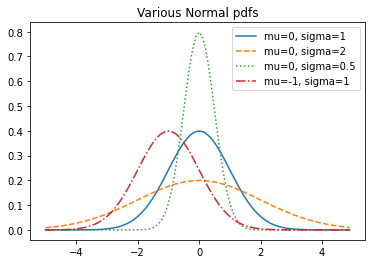

In [10]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

**표준정규분포(standard normal distribution)**는 $\mu =0$ 이고 $\sigma = 1$인 정규분포를 의미한다. 만약 $Z$가 표준정규분포의 확률변수를 나타낸다면
$$X = \sigma Z + \mu$$, $$Z = (X - \mu) / \sigma$$

정규분포의 누적 분포 함수는 Python의 **math.erf**를 사용하면 쉽게 표현할 수 있다.

In [11]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

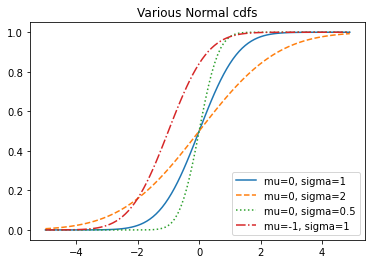

In [12]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)  # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [14]:
# 특정 확률을 갖는 확률변수의 값을 찾기 위해 normal_cdf의 역함수가 필요할 수도 있다. 누적 분포 함수가 연속 및 증가 함수라는 점을 고려하면
# 이진 검색을 사용해 비교적 쉽게 구할 수 있다.
def inverse_normal_cdf(p: float,
                      mu: float = 0,
                      sigma: float = 1,
                      tolerance: float = 0.00001) -> float:
    """이진 검색을 사용해 역함수를 근사"""
    # 표준정규분포가 아니라면 표준정규분포로 변환
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0  # normal_cdf(-10)은 0에 근접
    hi_z = 10.0  # normal_cdf(10)은 1에 근접
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # 중간 값
        mid_p = normal_cdf(mid_z)  # 중간 값의 누적분포 값을 계산
        if mid_p < p:
            low_z = mid_z  # 중간 값이 너무 작다면 더 큰 값들을 검색
        else:
            hi_z = mid_z  # 중간 값이 너무 크다면 더 작은 값들을 검색
    
    return mid_z

inverse_normal_cdf 함수는 원하는 확률 값에 가까워질 때까지 표준정규분포의 구간을 반복적으로 이등분한다.

## 6.7 중심극한정리
정규분포가 중요한 이유 중의 하나는 **중심극한정리(central limit theorem)** 때문이다. \
**중심극한정리**: 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 정리
- e.g. 
$(x_1 + ... + x_n)$을 평균 $\mu$와 표준편차 $\sigma$를 갖는 확률변수라고 해보자 \
n이 적당히 크면, $\frac{1}{n}(x_1 + ... + x_n)$은 대략 평균이 $\mu$이고 표준편차가 $\sigma / n$인 정규분포와 비슷해질 것이다. \
그렇다면 $\frac{(x_1 + ... + x_n) - \mu n}{\sigma \sqrt{n}}$는 대략 평균이 0이고 표준편차가 1인 정규분포와 비슷해질 것이다. \
중심극한 정리를 쉽게 이해하기 위해 이항 확률변수 (binomial random variable)을 예시로 살펴보면, \
이항 확률변수는 $n$과 $p$ 두 가지 파라미터로 구성되어 있다. 이항 확률변수는 단순히 $n$개의 독립적인 **베르누이 확률변수(Bernoulli random variable)**을 더한 것이다. 각 베르누이 확률변수의 값은 $p$의 확률로 1, 1-$p$의 확률로 0이 된다.

In [15]:
def bernoulli_trial(p: float) -> int:
    """p의 확률로 1을, 1-p의 확률로 0을 반환"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """n개 bernoulli(p)의 합을 반환"""
    return sum(bernoulli_trial(p) for _ in range(n))

베르누이 확률변수의 평균은 $p$이며, 표준편차는 $\sqrt{p(1-p)}$이다. \
중심극한정리는 $n$이 적당히 크면 이항 확률변수는 대략 평균이 $\mu = np$이고 표준편차는 $\sigma = \sqrt{np(1-p)}$인 정규분포의 확률변수와 비슷해진다는 것을 알려준다.

In [18]:
# 두 변수를 그래프로 나타낸다.

from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """binomial(n,p)의 결괏값을 히스토그램으로 표현"""
    data = [binomial(n,p) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대 그래프로 표현
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    # 근사된 정규분포를 라인 차트로 표현
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()


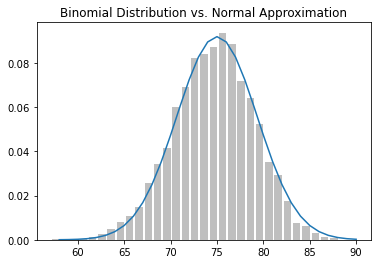

In [19]:
binomial_histogram(0.75, 100, 10000)